In [120]:
import numpy as np

def profit(odds, fees, investment=1):
    costs = np.array([odd / 100 * investment for odd in odds])
    fees = np.array(np.negative(fees))
    sale_prices = costs / (1 - fees)

    min_cost = np.min(costs)
    max_sale_price = np.max(sale_prices)

    profit = max_sale_price - min_cost
    return profit

def get_decimal_odds(odds):
    return np.array([100/odd for odd in odds])

In [ ]:
results = []

for x in np.arange(1, 100, 0.1):
    for y in np.arange(1, 100, 0.1):
        for average_fees in np.arange(0, 0.1, 0.001):
            odds = np.array([100/x, 100/y])
            arbitrage_percentage = sum(1 / odd for odd in odds)

            exp_return = profit(odds, np.array([average_fees, average_fees]))

            results.append((arbitrage_percentage, average_fees, exp_return))


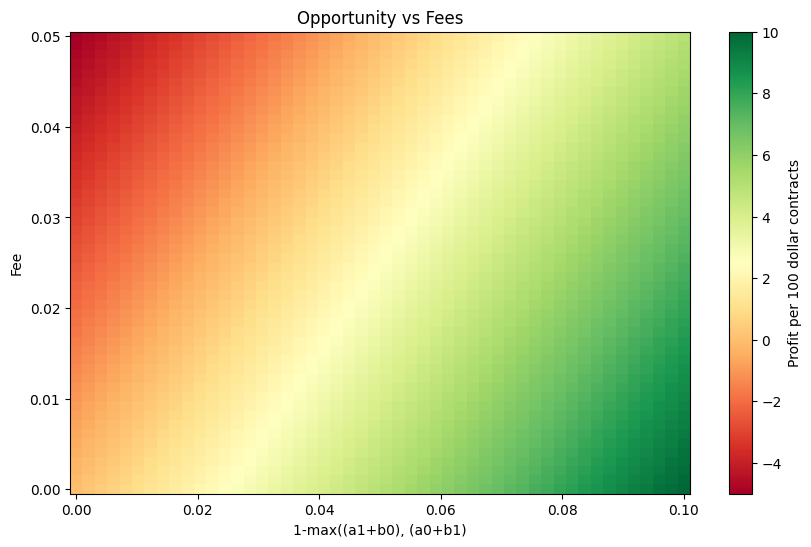

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

arb_percentages = np.linspace(0, 0.1, 50)
fees = np.linspace(0, 0.05, 50) 

arb_grid, fee_grid = np.meshgrid(arb_percentages, fees)
profit_grid = (arb_grid - fee_grid) * 100  

plt.figure(figsize=(10, 6))
c = plt.pcolormesh(arb_grid, fee_grid, profit_grid, cmap='RdYlGn', shading='auto')

plt.colorbar(c, label="Profit per 100 dollar contracts")
plt.xlabel("1-max((a1+b0), (a0+b1)")
plt.ylabel("Fee")
plt.title("Opportunity vs Fees")

plt.show()